In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.
size_shape = 2

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,size_shape))
    x1 = d1.sample((n,size_shape))
    y0 = torch.zeros((n, size_shape))
    y1 = torch.ones((n, size_shape))
    return torch.cat([x0.view(-1, size_shape), x1.view(-1, size_shape)], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [5]:
layer = nn.Linear(size_shape, size_shape)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.2785, -0.6993]), tensor(-0.4151)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 1.553915
Ошибка после 1 итераций: 0.541363
Ошибка после 2 итераций: 0.280913
Ошибка после 3 итераций: 0.201836
Ошибка после 4 итераций: 0.163941
Ошибка после 5 итераций: 0.139843
Ошибка после 6 итераций: 0.124352
Ошибка после 7 итераций: 0.112647
Ошибка после 8 итераций: 0.103404
Ошибка после 9 итераций: 0.096625
Ошибка после 10 итераций: 0.090382
Ошибка после 11 итераций: 0.085599
Ошибка после 12 итераций: 0.081404
Ошибка после 13 итераций: 0.077487
Ошибка после 14 итераций: 0.075445
Ошибка после 15 итераций: 0.072158
Ошибка после 16 итераций: 0.070144
Ошибка после 17 итераций: 0.068086
Ошибка после 18 итераций: 0.066152
Ошибка после 19 итераций: 0.064009


In [15]:
x_scale = np.linspace(-10, 10, 1000)
#x_scale = np.array(np.meshgrid(x_scale_1d, x_scale_1d)).T.reshape(-1, size_shape)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, size_shape), dtype=torch.float)
with torch.no_grad():
     dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

In [16]:
d0_pdf.shape

(1000,)

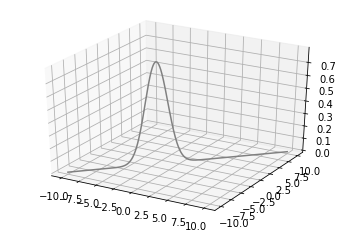

In [18]:
if (size_shape == 2):
    #fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x_scale, x_scale, d0_pdf*2, 'gray')
else:
    plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
    plt.plot(x_scale, d1_pdf*2, label='d1')
    plt.plot(x_scale, dist.flatten(), label='pred')
    plt.plot(x_scale, ratio, label='ratio')
    plt.legend();

In [23]:
print([p.data for p in layer.parameters()])

[tensor([[0.7995, 0.8364],
        [0.7504, 0.9252]]), tensor([-0.3950, -0.5318])]


In [24]:
torch.log(F.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [25]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)